# The Aerosol Distribution Tutorial

The following tutorial will show you how an aerosol distribution is represented in the opcsim model. You will learn how to use the sample datasets and how to create your own distribution from scratch. Additional visualization tools are also discussed.

First, we import the python libraries we need and set the styles used for plotting throughout this tutorial.

In [22]:
# Make imports
import opcsim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Set mathtext to display equations without italics
plt.rcParams.update({'mathtext.default': 'regular'})

# turn off warnings temporarily
import warnings
warnings.simplefilter('ignore')

# Let's set some default seaborn settings
sns.set(context='notebook', style='ticks', palette='dark',
        font_scale=1.75, rc={'figure.figsize': (10, 5)})

# The Aerosol Distribution

For the purpose of evaluating the performance of low-cost optical particle counters, we are going to assume that every aerosol distribution can be described as the sum of $n$ lognormal distributions (S+P 8.54). Thus, it follows that:

$$n_N^o(logD_p)=\sum_{i=1}^n \frac{N_i}{\sqrt{2\pi} * log\sigma_i}exp\Big(-\frac{(logD_p - logD_{pi})^2}{2log^2\sigma_i}\Big)$$

where $N_i$ is the number concentration, $D_{pi}$ is the median particle diameter (Geometric Mean), and $\sigma_i$ is the standard deviation. Thus, we need $3n$ parameters to describe a entire aerosol distribution.

Using the `opcsim.AerosolDistribution` class, we can build our own distributions by defining each aerosol mode as its own lognormal mode. 

Ex: Initialize an Aerosol Distribution with a single mode ($N=1000$, $D_{pg}=100\;nm$, $\sigma=1.5$)

In [ ]:
# Initialize a distribution
sample = opcsim.AerosolDistribution()

# Add a mode with N=1000, GM=0.1, GSD=1.5
sample.add_mode(n=1000, gm=0.1, gsd=1.5, label="Mode I")

Most aerosol distributions are composed of several lognormal modes. Table 8.3 in Seinfeld and Pandis (originally from Jaenicke (1993)) shows parameters for several model aerosol distributions. The urban aerosol distribution can be described as follows:

|Mode|$N$|$D_{pg}$|$log\sigma_i$|
|:--:|:-:|:------:|:--------:|
|I| 7100 | 0.0117 | 0.232 |
|II| 6320 | 0.0373 | 0.250 |
|III| 960 | 0.151 | 0.204 |



How would we go about building this distribution? We can add as many modes as we would like, following the same method we used above. Also, if you look at the API documentation for the `opcsim.AerosolDistribution` class, we see that you can add a label for the distribution as an argument upon initiation of the class instance.

In [ ]:
# Initiate a new aerosol distribution which is names 'Urban'
urban = opcsim.AerosolDistribution("Urban")

# Individually add each mode
urban.add_mode(7100, 0.0117, 10**0.232, "Mode I")
urban.add_mode(6320, 0.0373, 10**0.25, "Mode II")
urban.add_mode(960, 0.151, 10**0.204, "Mode III")

To make things even easier, we have included the model distributions directly into the package which can be accessed via the `opcsim.load_distribution` function. To import the distribution, simply call `opcsim.load_distribution` and provide the name of the distribution you would like to use as an argument. Options include: 

  * Urban
  * Marine
  * Rural
  * Remote Continental
  * Free Troposphere
  * Polar
  * Desert
  
To read in the urban distribution, we would do the following:

In [ ]:
urban = opcsim.load_distribution("Urban")

## Incorporating Optical and Chemical Properties of Aerosols

This library was created for evaluating particle sensors' response to aerosol distributions. Thus, it is extremely important to consider the effects of aerosol optical properties as well. In addition to the size parameters described above, each mode has a few additional properties you can set:

  * **kappa**: the $\kappa$-kohler coefficient for describing water uptake
  * **rho**: the particle density, $\rho$
  * **refr**: the complex refractive index, $n$
  
Each of these is set at the individual mode level and has defaults of $\kappa=0$, $\rho=1$, and $RI=1.5+0i$.

Thus, if we wanted to create a distribution with a single mode of Ammonium Sulfate:

In [23]:
amm_sulf = opcsim.AerosolDistribution("Ammonium Sulfate")

# add a single mode of ammonium sulfate
amm_sulf.add_mode(n=1000, gm=0.08, gsd=1.5, label="mode_1", 
            refr=(1.521+0j), rho=1.77, kappa=0.53)

amm_sulf

AerosolDistribution: Ammonium Sulfate

If you wanted, you could also add multiple modes with different optical properties. In addition, there are a few helper functions, found in the utilities, that make it simple to make homogeneous aerosol mixtures. At this point in time, the library does not support heterogeneous mixtures or core-shell models, though it may in the future if their is demand.

# Probability Distribution Function

## Number Distribution

Aerosol distributions are typically depicted using the probabliity distribution function (PDF). In Seinfeld and Pandis, they refer to it as the **Number Distribution Function**. When plotted in log-space (i.e. $dN/dlogD_p$), the area under the curve is the aerosol number concentration. 

Mathematically, the PDF in number-space looks like the following:

$$n_N^o(logD_p)=\frac{dN}{dlogD_p}=\frac{N_t}{\sqrt{2\pi} \; log\sigma_g}exp\Big(-\frac{(logD_p - logD_{pg})^2}{2log^2\sigma_g}\Big)$$

All three representations of the number distribution are available:

  * $dN/dD_p$: `opcsim.equations.pdf.dn_ddp`
  * $dN/dlnD_p$: `opcsim.equations.pdf.dn_dlndp`
  * $dN/dlogD_p$: `opcsim.equations.pdf.dn_dlogdp`

While mathematically, representing the aerosol distribution in any base {log, log10, none} is equivilant, visually it is not. For this reason, when plotting, we use the log10-base so that the area under the curve represents the total aerosol number concentration. For example, if we were to plot all three bases on the same plot for the Urban distribution, we would get:


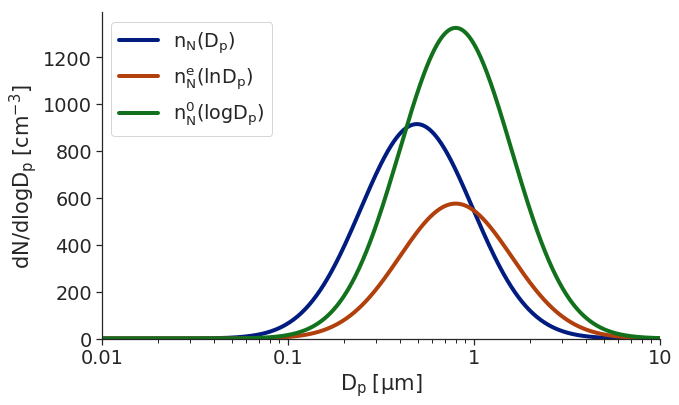

In [24]:
sample = opcsim.AerosolDistribution("Sample")
sample.add_mode(1000, 0.8, 2)

fig, ax = plt.subplots(1, figsize=(10, 6))

ax = opcsim.plots.pdfplot(sample, ax=ax, weight='number', base='none', label='$n_N(D_p)$')
ax = opcsim.plots.pdfplot(sample, ax=ax, weight='number', base='log', label='$n_N^e(lnD_p)$')
ax = opcsim.plots.pdfplot(sample, ax=ax, weight='number', base='log10', label='$n_N^0(logD_p)$')

ax.legend(loc='upper left')
ax.set_ylim(0, None)
ax.set_xlim(0.01, 10)
sns.despine()

## Surface Area Distribution

It is also quite useful to look at the surface area and volume distributions. The surface area probability distribution can easily be obtained by relating to the number probability distribution in the following way:

$$n_S^o(logD_p)=\pi D_p^2 n_N^o(logD_p)=\frac{dS}{dlogD_p}=\frac{\pi D_p^2 N_t}{\sqrt{2\pi} \; log\sigma_g}exp\Big(-\frac{(logD_p - logD_{pg})^2}{2log^2\sigma_g}\Big)$$

All three representations of the surface area distribution are available:

  * $dS/dD_p$: `opcsim.equations.pdf.ds_ddp`
  * $dS/dlnD_p$: `opcsim.equations.pdf.ds_dlndp`
  * $dS/dlogD_p$: `opcsim.equations.pdf.ds_dlogdp`

## Volume Distribution

Likewise, for the volume distribution, we get:

$$n_V^o(logD_p)=\frac{\pi}{6} D_p^3 n_N^o(logD_p)=\frac{dV}{dlogD_p}=\frac{\pi D_p^3 N_t}{6\sqrt{2\pi} \; log\sigma_g}exp\Big(-\frac{(logD_p - logD_{pg})^2}{2log^2\sigma_g}\Big)$$

All three representations of the volume distribution are available:

  * $dV/dD_p$: `opcsim.equations.pdf.dv_ddp`
  * $dV/dlnD_p$: `opcsim.equations.pdf.dv_dlndp`
  * $dV/dlogD_p$: `opcsim.equations.pdf.dv_dlogdp`
  

### Evaluating the PDF
`opcsim` provides the `AerosolDistribution.pdf` method to easily calculate the distribution at any particle diameter. The arguments of the function are the particle diameter (`dp`), the base (`none`, `log`, or `log10`), the weight (`number`, `surface`, `volume`, or `mass`), and an optional `mode` parameter in case you would like to examine only one of the modes of the distribution at a time. The default arguments are set to be the most useful/common ones (i.e. `weight='number'`, `base='log10'`). If calculating the mass-weighted PDF, you can also provide an optional keyword argument `rho`; the default value for particle density is $1\;gcm^{-3}$.

To calculate the number probability for the urban aerosol distribution at $0.1 \; \mu m$, we can do the following:

In [25]:
urban.pdf(0.1)

3606.2139576648124

This gives us the number concentration probability at 1 micron in units of $particles\;cm^{-3}$. We can also calculate a whole range of values by providing an array for the `dp` value:

In [26]:
urban.pdf(np.array([0.1, 0.2, 0.3]))

array([3606.21395766, 1712.82519467,  659.56432207])

To calculate the volume-weighted PDF at some particle diameter ($dV/dlogD_p$), we could do the following:

In [27]:
urban.pdf(0.1, weight='volume')

1.8882092127787917

This returns $dV/dlogDp$ at particle diameter $D_p=0.1\;\mu m$ in units of $\mu m^3 cm^{-3}$.

# Visualizing the Distribution

Visualizing the PDF for an aerosol distribution is extremely helpful. The function `opcsim.plots.pdfplot` has been included to make this simple.

To plot the pdf of an aerosol distribution, the only required input is the `opcsim.AerosolDistribution` object. The function returns a matplotlib axis object which makes it extremely easy to add to modify the plot using normal matplotlib syntax.

Let's plot the urban distribution we built earlier.

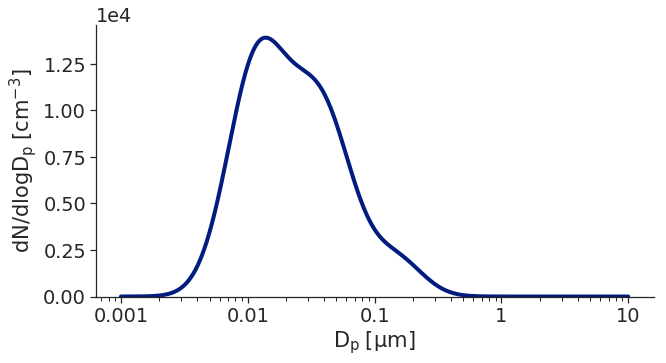

In [28]:
ax = opcsim.plots.pdfplot(urban)

# Set the y-lim to start at 0
ax.set_ylim(0, None)

# Remove the right and top spines
sns.despine();

## kwargs for the PDF Plot

We can also send a number of kwargs to the PDF plot to change its appearance. We can add `plot_kws` to the matplotlib plot call (things like linewidth, color, etc). We can add `fig_kws` which are sent when creating the figure (think figsize, etc). We can set `fill_kws` that are sent to the matplotlib fill_between call if and only if `fill=True`.

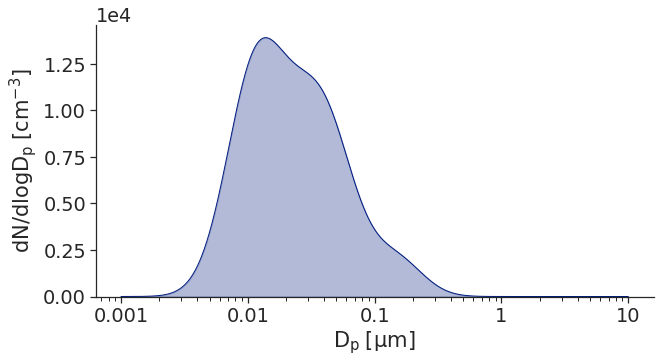

In [29]:
ax = opcsim.plots.pdfplot(urban, fill=True, fill_kws=dict(alpha=.3), plot_kws=dict(linewidth=1))

# Set the y-lim to start at 0
ax.set_ylim(0, None)

# Remove the right and top spines
sns.despine();

We can also go ahead and plot each individual mode along with the entire distribution using the `with_modes` argument:

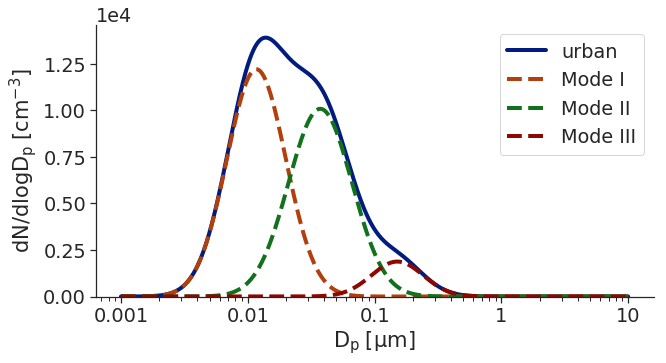

In [30]:
ax = opcsim.plots.pdfplot(urban, with_modes=True)

ax.legend(loc='best')

# Set the y-lim to start at 0
ax.set_ylim(0, None)

# Remove the right and top spines
sns.despine();

Still staying in number space, we can go ahead and plot all of the available sample distributions to get a feel for just how different they are!

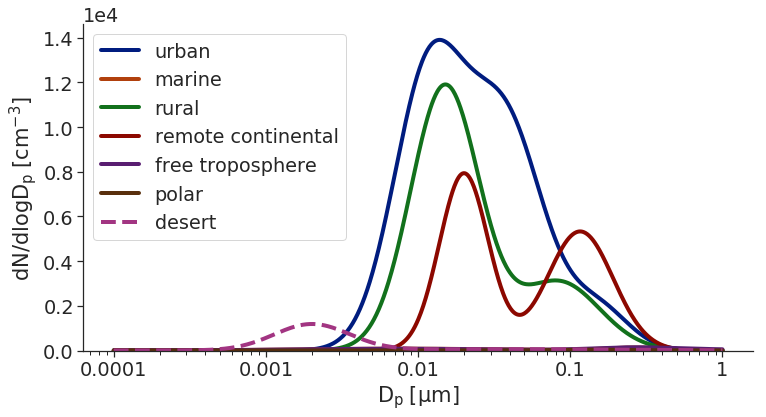

In [31]:
fig, ax = plt.subplots(1, figsize=(12,6))

# Iterate over every sample in the library
for i, sample in enumerate(opcsim.distributions.DISTRIBUTION_DATA.keys()):
    # Load the sample dataset
    _sample = opcsim.load_distribution(sample)
    
    # if we've used more colors than we have available in this palette, change the linestyle
    ls = '-' if i < 6 else '--'
    
    opcsim.plots.pdfplot(_sample, ax=ax, plot_kws={'linestyle': ls}, dp=np.logspace(-4, 0, 1000))
    
# Add a legend
ax.legend(loc='upper left')

# Set the y-lim
ax.set_ylim(0, None)

# remove the spine
sns.despine()

Finally, we can also go ahead and look at one distribution in number, surface area, and volume weighted views:

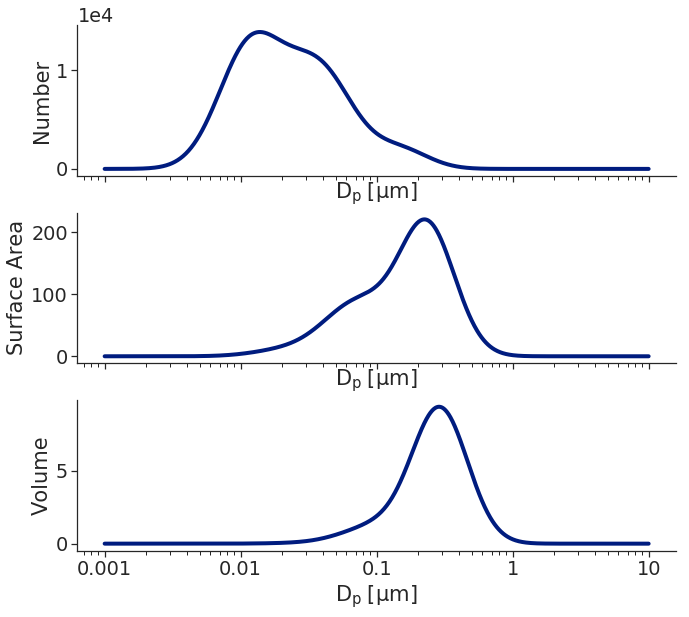

In [33]:
fig, ax = plt.subplots(3, figsize=(10,9), sharex=True)

opcsim.plots.pdfplot(urban, weight='number', ax=ax[0])
opcsim.plots.pdfplot(urban, weight='surface', ax=ax[1])
opcsim.plots.pdfplot(urban, weight='volume', ax=ax[2])

fig.subplots_adjust(hspace=0)

ax[0].set_ylabel("Number")
ax[1].set_ylabel("Surface Area")
ax[2].set_ylabel("Volume")

sns.despine()

plt.tight_layout(h_pad=0)
plt.show()

## Visualizing the Effects of Relative Humidity on Particle Growth

If we define a distribution that has a non-zero kappa value, we can visualize changes in particle size due to water uptake as follows:

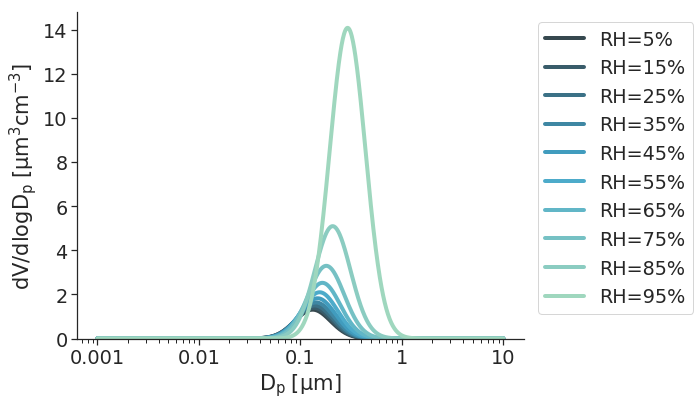

In [34]:
amm_sulf = opcsim.AerosolDistribution("Ammonium Sulfate")

# add a single mode of ammonium sulfate
amm_sulf.add_mode(n=1000, gm=0.08, gsd=1.5, label="mode_1", 
            refr=complex(1.521, 0), rho=1.77, kappa=0.53)

# set up a range of rh's to evaluate and plot
rh = np.linspace(5, 95, 10)

# define a color palette with the right number of colors
cpal = sns.color_palette("GnBu_d", len(rh))

# set up a figure
fig, ax = plt.subplots(1, figsize=(8, 6))

# iterate over each rh and plot
for i, each in enumerate(rh):
    ax = opcsim.plots.pdfplot(amm_sulf, rh=each, plot_kws=dict(color=cpal[i]),
                              ax=ax, weight='volume', label="RH={:.0f}%".format(each))

# tidy up
ax.set_ylim(0, None)
ax.legend(bbox_to_anchor=(1.01, 1))
sns.despine()

# Cumulative Distribution Function

We can easily obtain the integrated value for number of particles, total surface area, total volume, or total mass by integrating the correct CDF. 

## Number CDF

The total number of particles between two particle diameters can be found by completing the following integration

$$N_t=\int_{D_{min}}^{D_{max}}n_N(D_p)dD_p$$

## Surface Area CDF

We can find the total particle surface area between two diameters using the following integral:

$$S_t=\pi \int_{D_{min}}^{D_{max}}D_p^2 n_N(D_p)dD_p$$

## Volume CDF

We can find the total particle volume between two diameters using the following integral:

$$V_t=\frac{\pi}{6} \int_{D_{min}}^{D_{max}}D_p^3 n_N(D_p)dD_p$$


To evaluate the CDF, we use the `opcsim.AerosolDistribution.cdf` method. For example, to evaluate the number of particles with diameter less than $D_p=2.5\;\mu m$, we do the following:

In [ ]:
urban.cdf(dmax=2.5)

If we want to calculate the total number of particles within some size range, we can add the `dmin` argument. For example, let's find the total number of particles between 1 and 2.5 microns:

In [ ]:
urban.cdf(dmin=1, dmax=2.5)

What about the total mass of particles less than $D_p=1 \; \mu m$? (i.e. $PM_1$)

In [ ]:
urban.cdf(dmax=1, weight='volume')

Last, how about the total mass of particles in the Urban distribution if we set the particle density $\rho=1.65\;gcm^{-3}$:

In [ ]:
urban.cdf(dmax=10, weight='mass', rho=1.65)

Although we wouldn't normally plot the CDF, we easily can to visualize where most of the [number, surface area, mass] is within the distribution using the `opcsim.plots.cdfplot` function:

In [ ]:
ax = opcsim.plots.cdfplot(urban)

ax.set_ylim(0, None)
sns.despine()

Lastly, we can plot the total volume CDF to get an idea of where the mass is distributed:

In [ ]:
ax = opcsim.plots.cdfplot(urban, weight='mass', rho=1.65)

ax.set_ylim(0, None)
sns.despine()